In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut


In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load dataset

Load dataset yang ingin dipre-process dengan menggunakan `pd.read_csv()`.

In [5]:
## CODE HERE
data = pd.read_csv('c://data//PriceCar_TrainData.csv')
data.sample(8)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5418,5418,Hyundai Verna 1.6 SX,Chennai,2013,85350,Diesel,Manual,Second,22.32 kmpl,1582 CC,126.32 bhp,5.0,NaN,5.70
1720,1720,Hyundai Grand i10 Sportz,Coimbatore,2015,36840,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,5.64
510,510,Skoda Fabia 1.6 MPI Elegance,Pune,2012,41629,Petrol,Manual,Second,14.83 kmpl,1598 CC,105 bhp,5.0,NaN,2.25
5628,5628,Honda CR-V 2.0 AT,Jaipur,2014,112827,Petrol,Automatic,First,13.1 kmpl,1997 CC,141.1 bhp,5.0,NaN,10.50
2892,2892,Hyundai i20 Sportz Diesel,Coimbatore,2011,68439,Diesel,Manual,First,23.0 kmpl,1396 CC,90 bhp,5.0,NaN,3.37
1074,1074,Honda City 1.5 V AT Sunroof,Kochi,2016,47681,Petrol,Automatic,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,NaN,8.73
3797,3797,BMW 3 Series 320d Prestige,Mumbai,2015,56000,Diesel,Automatic,First,18.88 kmpl,1995 CC,184 bhp,5.0,NaN,22.75
3557,3557,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,48000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,NaN,13.50


Pastikan isi dataset dengan menggunakan `df.info()` dan `df.describe()`. Pisahkan kolom menjadi numerik dan kategorikal apabila diperlukan.

In [4]:
## CODE HERE
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.4+ KB


- data terdiri dari 6019 baris dan 14 kolom
- terdapat data yang null pada kolom mileage, engine, power, seats,  new price
- tipe data pada targer klasifikasi adalah price yang datanya berupa float 
- sehingga data perlu dibagi menjadi karakter dan numerikal

In [5]:
cat = ['Name','Location','Fuel_Type','Transmission','Owner_Type',
      'Mileage','Engine','Power','New_Price']
num = ['Year','Kilometers_Driven','Seats','Price']

In [6]:
data[cat].describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,63.71 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


- nama dan brand mobil yang terlaris adalah Mahindra XUV500 W8 2WD dengan jumlah 49 mobil
- kolom nama mobil, mileage, engine, power, new price memiliki unik yang banyak ada kemungkinan tidak berguna pada klasifikasi
- lokasi dealer dengan kuantitas mobil terbanyak adalah dikota mumbai
- jenis mesin yang paling banyak dipakai adalah diesel
- pengguna lebih menyukai mobil dengan transmisi manual
- paling banyak adalah pemilik mobil tangan pertama, artinya paling banyak mereka beli mobil baru 


In [7]:
data[num].describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


- pada kolom year, kilometers driven, dan seats rentan nilai mean dan median cukup baik, artinya tidak memiliki rentan nilai yang jauh
- sedangkan pada kolom price memiliki rentan nilai median dan meannya cukup jauh, sehingga kemungkinan ini terjadi skewed


In [8]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom Name:
Mahindra XUV500 W8 2WD                       49
Maruti Swift VDI                             45
Honda City 1.5 S MT                          34
Maruti Swift Dzire VDI                       34
Maruti Swift VDI BSIV                        31
Maruti Ritz VDi                              30
Hyundai i10 Sportz                           30
Toyota Fortuner 3.0 Diesel                   29
Hyundai Grand i10 Sportz                     27
Honda Amaze S i-Dtech                        27
Maruti Ertiga VDI                            25
Honda Brio S MT                              25
Honda City 1.5 V MT                          24
Maruti Wagon R VXI                           23
Hyundai Verna 1.6 SX                         23
Maruti Wagon R LXI                           22
Maruti Alto LXi                              21
Skoda Superb Elegance 1.8 TSI AT             20
BMW 3 Series 320d                            20
Hyundai EON Era Plus                         20
Maruti Ertiga ZD

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*


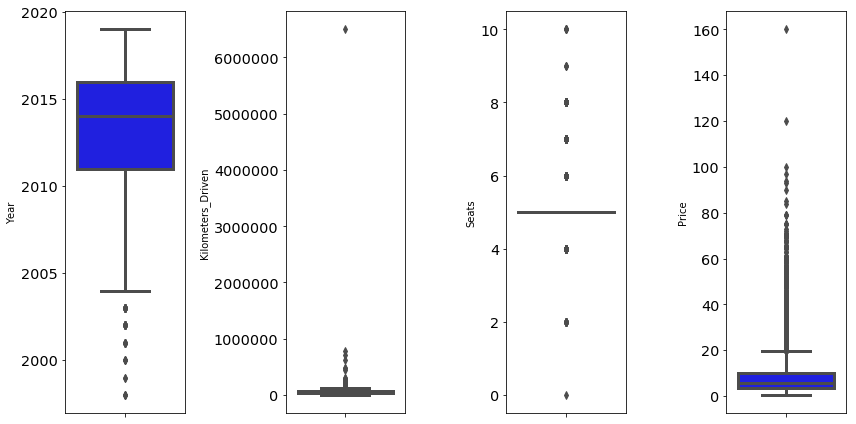

In [9]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(data[num[i]], color='blue', orient='v')
    plt.tight_layout()

- terdapat outliar pada year, kilometers driven, seats dan price
- kemungkinan year skewed negatif
- kemungkinan kilometers driven dan price skewed positif

C:\Users\asus\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\asus\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


ValueError: array must not contain infs or NaNs

<Figure size 864x360 with 0 Axes>

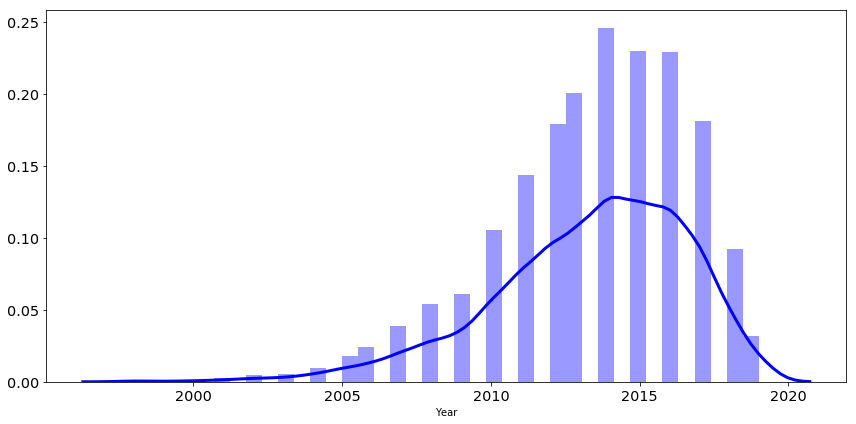

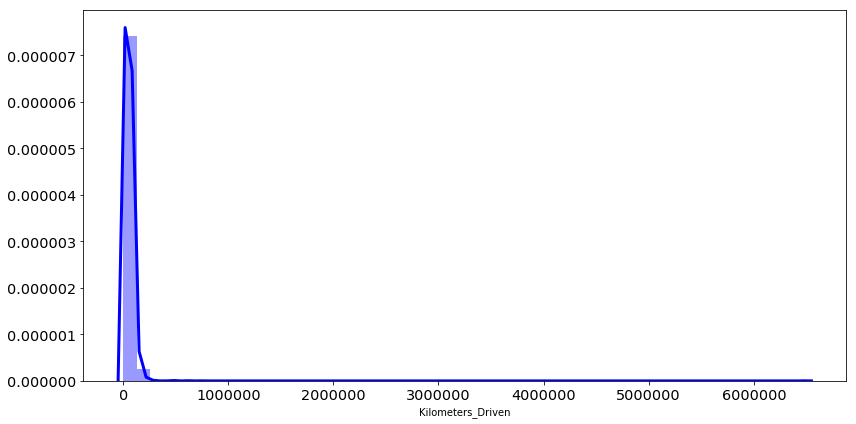

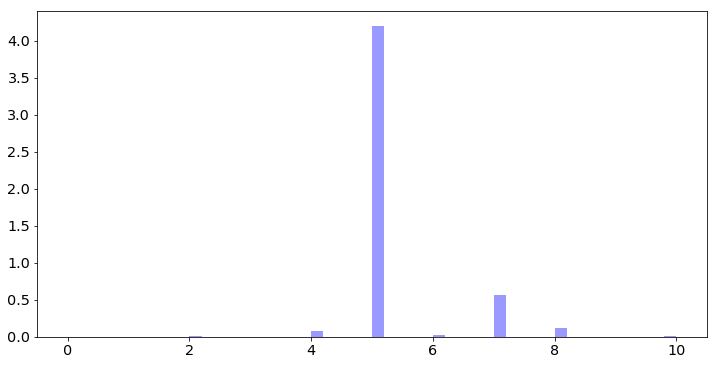

In [10]:
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.figure()
    sns.distplot(data[num[i]], color='blue')
    plt.tight_layout()

- terlihat sedikit skewed kiri pada kolom year
- untuk kolom seat tidak terlihat arahnya, namun modus pada seats 5
- sedangkan untuk kolom kilometers driven dan price cenderung skewed kanan

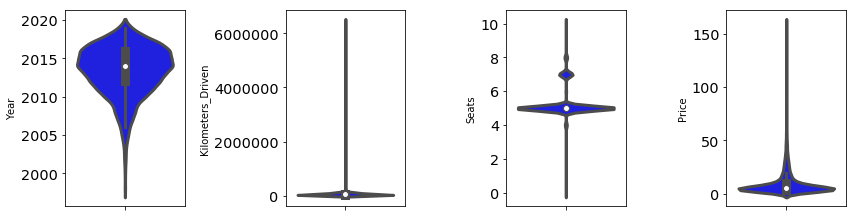

In [15]:
#violin plot : alternatif jika kesulitan membaca distribusi data
for i in range(0, 4):
    plt.subplot(2,4, i+1)
    sns.violinplot(data[num[i]], color='blue', orient='v')
    plt.tight_layout()

terbukti dengan gambar distribusinya

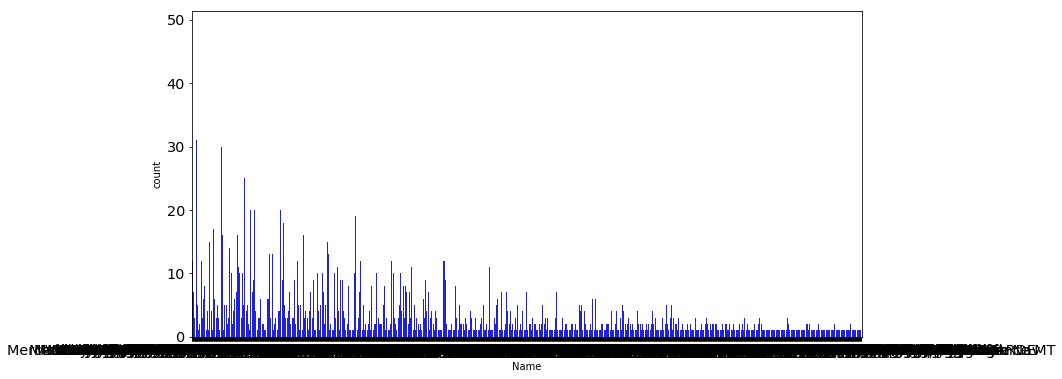

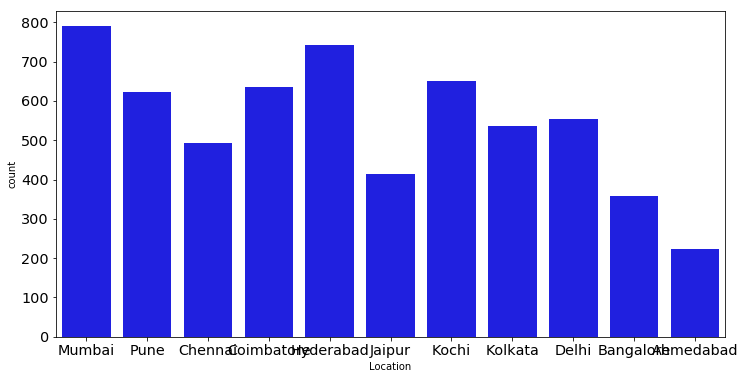

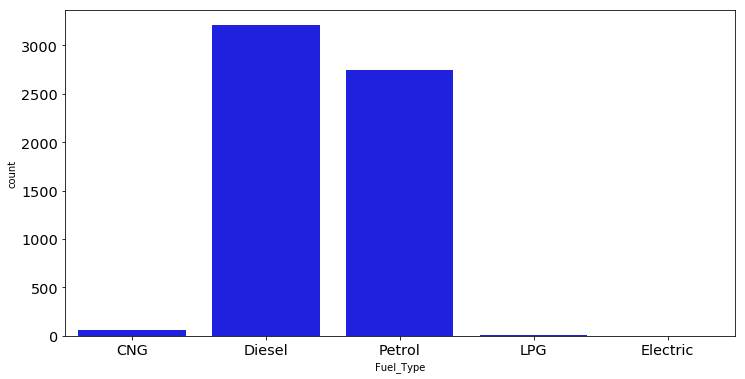

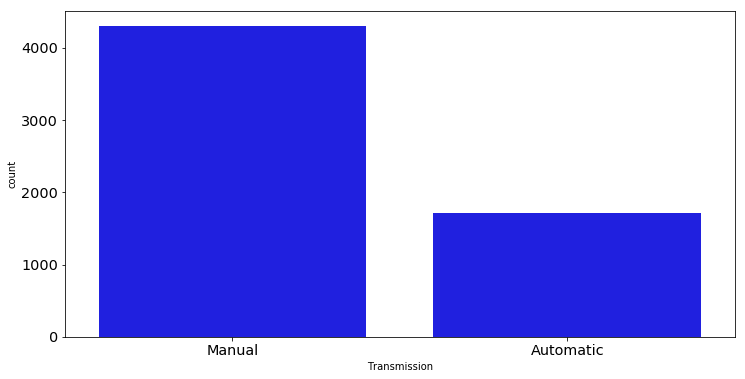

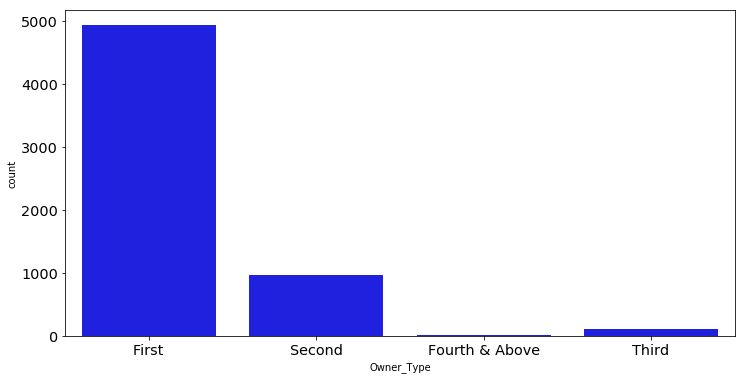

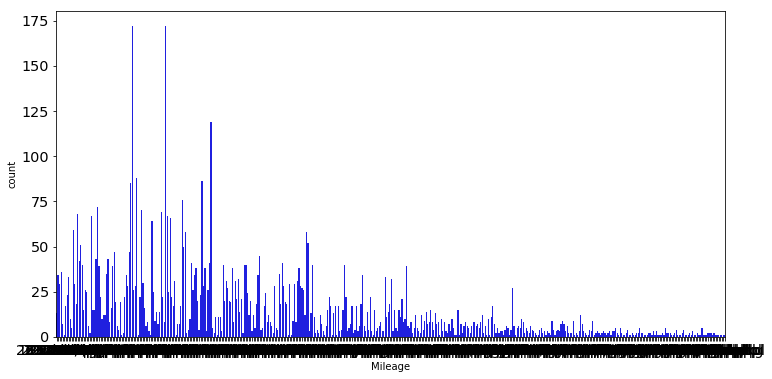

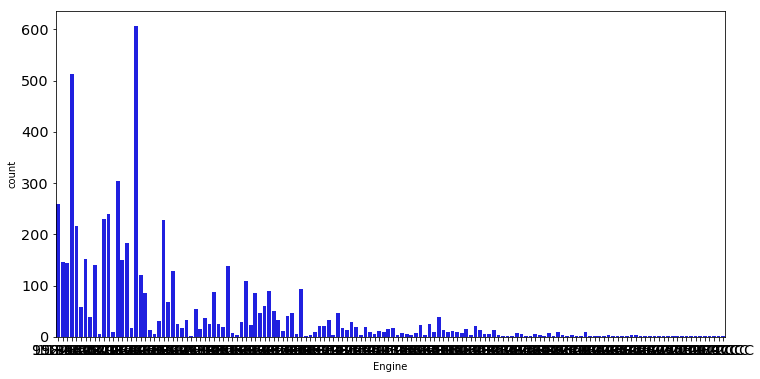

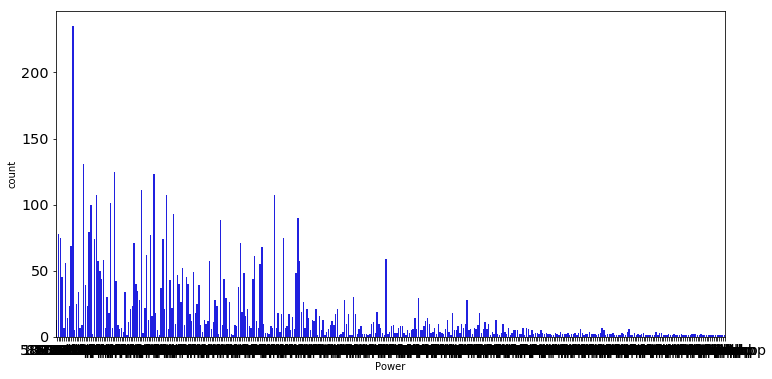

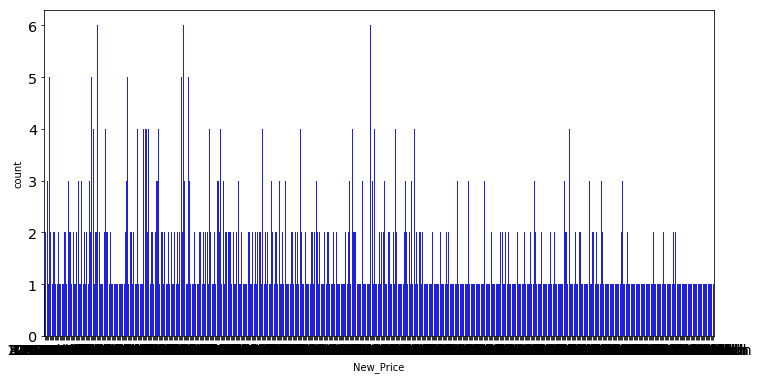

In [11]:
for i in range(0, 9):
    plt.figure()
    sns.countplot(data[cat[i]], color='blue', orient='v')
    

- untuk fuel_type didominasi oleh diesel dan petrol
- untuk transmission manual jauh lebih banyak kuantitasnya pada mobil second
- untuk owner type didominasi oleh pemilik tangan pertama


## Missing Data

Pertama, kita akan menangani data-data yang hilang. Cek jumlah data yang hilang dengan menggunakan `df.isna().sum()`.

In [11]:
## CODE HERE
data.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Kolom apa saja yang memiliki data hilang/tidak lengkap? Ada berapa kolom? kolom yang memiliki data hilang ada 5 kolom, yaitu kolom engine, power, seats, new_price, mileage. 

### Drop

Apakah kita ingin menangani data dengan cara menghapus mereka? Kalau ya, hapus baris-baris dengan menggunakan `df.dropna()`.

In [12]:
## CODE HERE
data.dropna(subset=['Engine'], inplace=True)
data.dropna(subset=['Power'], inplace=True)
data.dropna(subset=['Seats'], inplace=True)
data.dropna(subset=['Mileage'], inplace=True)

Kenapa akhirnya kita putuskan untuk menghapus data yang hilang saja?
DIHAPUS PADA FEATURE PREDIKTOR KARENA MISSING VALUE KURANG DARI 10%, 

### Imputasi Numeric

Apakah kita ingin menangani data hilang di kolom tertentu dengan imputasi? Kalau ya, lakukan imputasi dengan menggunakan `df.fillna()`

In [13]:
## CODE HERE


Kenapa akhirnya kita putuskan untuk melakukan imputasi pada kolom-kolom tersebut? tidak ada missing values pada numerikal yang perlu di imputasi, karena kolom year, price, dan kilometers_driven tidak ada yang null, sedangkan penanganan null pada kolom seats dilakukan drop/ hapus.

### Imputasi Categorical

Apakah kita ingin menangani data hilang di kolom tertentu dengan imputasi? Kalau ya, lakukan imputasi dengan menggunakan `df.fillna()`

In [13]:
## CODE HERE

data['New_Price'].fillna(data['New_Price'].mode()[0], inplace=True)

Kenapa akhirnya kita putuskan untuk melakukan imputasi pada kolom-kolom tersebut? Nilai apa yang digunakan untuk imputasi dan mengapa?
karena missing value lebih dari 10%, nilai yang digunakan adalah modusnya pada feature tersebut, karena biasanya pada kategorik diimputasi dengan modus.

Cek sekali lagi apakah semua nilai hilang sudah ditangani.

In [14]:
## CODE HERE
data.isna().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

## Duplicated Data

Selanjutnya, kita akan menangani data duplikat. Gunakan `df.duplicated.sum()` untuk mengecek jumlah kolom hilang. Kemudian gunakan `df.drop_duplicates()` untuk menghapus baris-baris duplikat.

In [15]:
## CODE HERE
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

0
0


Apakah akhirnya semua data duplikat dihapus? Mengapa?
tidak ada data yang duplikat.

## Outliers

Setelah data yang hilang dan duplikat, kita akan menangani outlier. Ada 2 cara untuk melakukan ini:
* Dengan Z-score
* Dengan IQR

### Menggunakan Z-score

Apakah kita memutuskan untuk menangani outlier dengan Z-score? Mengapa?

In [16]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')
## CODE HERE
filtered_entries = np.array([False] * len(data))
for col in ['Year','Kilometers_Driven','Price','Seats']:
    zscore = abs(stats.zscore(data[col]))
    print(np.max(zscore))
    filtered_entries = (zscore > 3) | filtered_entries
    
data1 = data[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data1)}')


Jumlah baris sebelum memfilter outlier: 5975
4.738817325666907
70.35789976168822
13.431598827660808
6.5260058874396565
Jumlah baris setelah memfilter outlier: 5627


### Menggunakan IQR

Apakah kita memutuskan untuk menangani outlier dengan IQR? Mengapa?

In [18]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

## CODE HERE
filtered_entries = np.array([False] * len(data))
for col in ['Year','Kilometers_Driven','Price','Seats']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] < low_limit) | (data[col] > high_limit)) | filtered_entries
    
data1 = data[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data1)}')

Jumlah baris sebelum memfilter outlier: 5975
Jumlah baris setelah memfilter outlier: 4289


ternyata tidak ada outliars karena sebelum filter = setelah filter outliars

### Normalization/Standardization

Apakah kita perlu melakukan normalization/standardization?

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
## CODE HERE

data['Year_norm'] = MinMaxScaler().fit_transform(data['Year'].values.reshape(len(data), 1))
data['Kilometers_Driven_norm'] = MinMaxScaler().fit_transform(data['Kilometers_Driven'].values.reshape(len(data), 1))
data['Seats_norm'] = MinMaxScaler().fit_transform(data['Seats'].values.reshape(len(data), 1))
data['Price_norm'] = MinMaxScaler().fit_transform(data['Price'].values.reshape(len(data), 1))

Apakah kita melakukan normalization/standardization? 
iya, untuk menyeragamkan range nilainya saja
Cek apakah nilai tertransformasi dengan benar dengan menggunakan `df.describe()`

In [18]:
## CODE HERE
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price,Year_norm,Kilometers_Driven_norm,Seats_norm,Price_norm
count,5975.00000,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,3008.80887,2013.386778,5.867431e+04,5.278828,9.501647,0.732704,0.009001,0.527883,0.056791
std,1739.30056,3.247238,9.155851e+04,0.808959,11.205736,0.154630,0.014086,0.080896,0.070229
min,0.00000,1998.000000,1.710000e+02,0.000000,0.440000,0.000000,0.000000,0.000000,0.000000
25%,1502.50000,2012.000000,3.390800e+04,5.000000,3.500000,0.666667,0.005190,0.500000,0.019178
50%,3010.00000,2014.000000,5.300000e+04,5.000000,5.650000,0.761905,0.008128,0.500000,0.032652
75%,4514.50000,2016.000000,7.300000e+04,5.000000,9.950000,0.857143,0.011205,0.500000,0.059601
max,6018.00000,2019.000000,6.500000e+06,10.000000,160.000000,1.000000,1.000000,1.000000,1.000000


### Feature Encoding

Apakah kita perlu melakukan feature encoding?

In [24]:
#dibagian bawah

Mengapa kita memerlukan feature encoding? Jenis feature encoding apa yang kita akhirnya gunakan dan mengapa?

Jangan lupa gabungkan encoded feature dengan dataframe awal dan cek apakah sudah tergabung dengan baik dengan menggunakan `df.columns`

## Imbalanced Dataset

Apakah target kita imbalanced? Cek dengan menggunakan `value_counts()`. Apakah kita perlu melakukan Over/Undersampling?

Kalau ya, persiapkan data kitauntuk over/undersampling dengan memisahkan mereka ke variabel `X` dan `y`.

In [19]:
data['price_class'] = data['Price'] > 0.8
data['price_class'].value_counts()

True     5935
False      40
Name: price_class, dtype: int64

In [20]:
## CODE HERE
X = data[[col for col in data.columns if (str(data[col].dtype) != 'object') and col not in ['Price', 'price_class']]]
y = data['price_class'].values
print(X.shape)
print(y.shape)

(5975, 8)
(5975,)


Lakukan over/under sampling dengan menggunakan Sampler dari `imblearn`.

In [21]:
from imblearn.over_sampling import SMOTE
## CODE HERE
from imblearn import under_sampling
X_over, y_over = under_sampling.RandomUnderSampler().fit_resample(X, y)
pd.Series(y_over).value_counts()

True     40
False    40
dtype: int64

Jangan lupa cek distribusi kelas/label setelah sampling dengan menggunakan `value_counts()`.

## Bivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

menghapus kolom nomor (unnamed:0) karena tidak berguna untuk korelasi

In [22]:
data = data.drop(['Unnamed: 0'], 1)

In [23]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 18 columns):
Name                      5975 non-null object
Location                  5975 non-null object
Year                      5975 non-null int64
Kilometers_Driven         5975 non-null int64
Fuel_Type                 5975 non-null object
Transmission              5975 non-null object
Owner_Type                5975 non-null object
Mileage                   5975 non-null object
Engine                    5975 non-null object
Power                     5975 non-null object
Seats                     5975 non-null float64
New_Price                 5975 non-null object
Price                     5975 non-null float64
Year_norm                 5975 non-null float64
Kilometers_Driven_norm    5975 non-null float64
Seats_norm                5975 non-null float64
Price_norm                5975 non-null float64
price_class               5975 non-null bool
dtypes: bool(1), float64(6), int64(2), object

In [24]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Year_norm,Kilometers_Driven_norm,Seats_norm,Price_norm,price_class
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,4.78 Lakh,1.75,0.571429,0.011051,0.5,0.008210,True
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,4.78 Lakh,12.50,0.809524,0.006282,0.5,0.075583,True
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0.619048,0.007051,0.5,0.025445,True
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,4.78 Lakh,6.00,0.666667,0.013359,0.7,0.034846,True
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,4.78 Lakh,17.74,0.714286,0.006231,0.5,0.108423,True


### Correlation heatmap

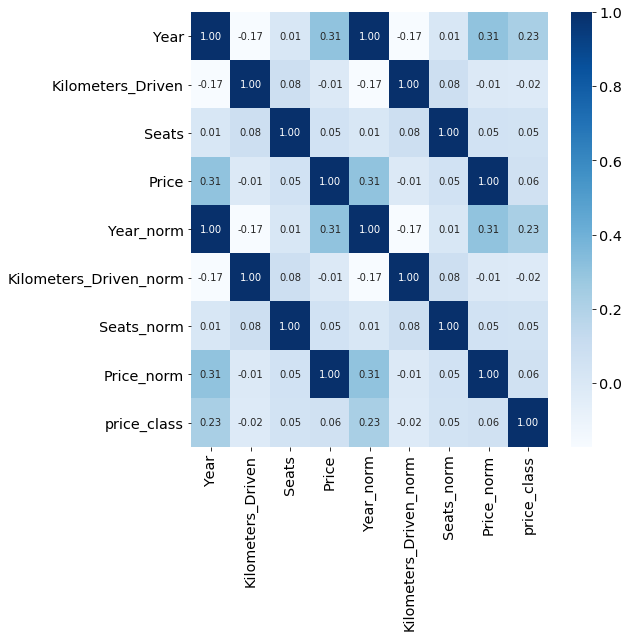

In [25]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')

dengan hasil :
- target price memiliki korelasi positif cenderung lemah dengan Year 
- melihat secara keseluruhan cenderung lemah untuk korelasi antar featurenya
- sehingga secara keseluruhan perlu dilakukan treatment khusus untuk menemukan korelasi yang cukup kuat

<Figure size 1080x1080 with 0 Axes>

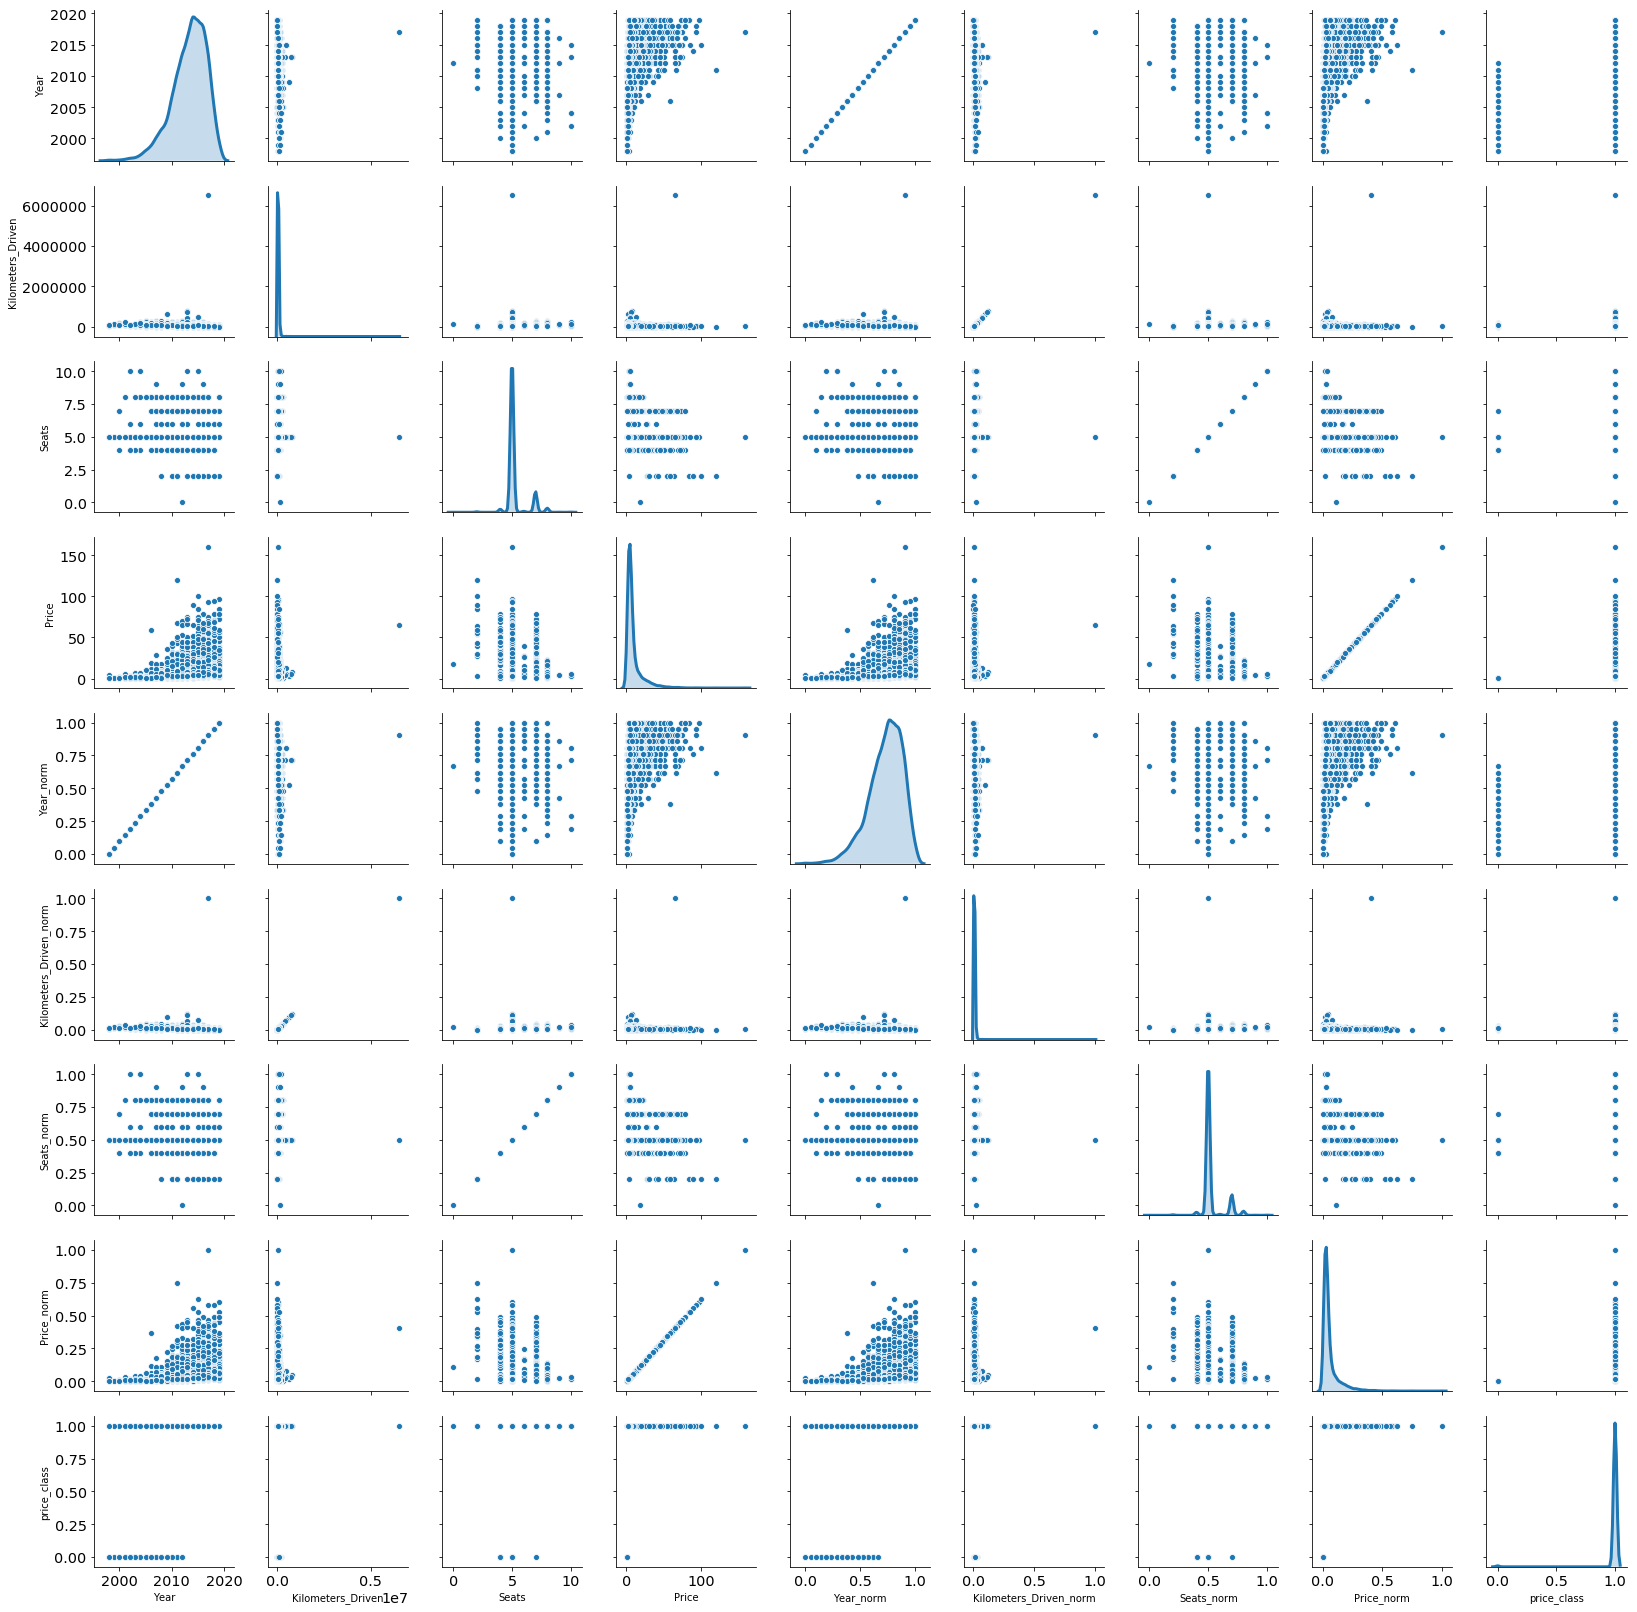

In [26]:
plt.figure(figsize=(15, 15))
sns.pairplot(data, diag_kind='kde')

- terlihat semakin tinggi tahun semakin tinggi harganya
- untuk kilometers driven pun terlihat semakin kecil kilometers driven maka harga cenderung tinggi
- untuk seats terbukti seats 5 paling banyak
- harus menghapus beberapa feature yang sekiranya membuat terjadi bias antar kedua featurenya

### Category plots

Terakhir kita tampilkan *category plot* untuk setiap pasangan kategori *numeric* dan *categorical* seperti di bawah ini

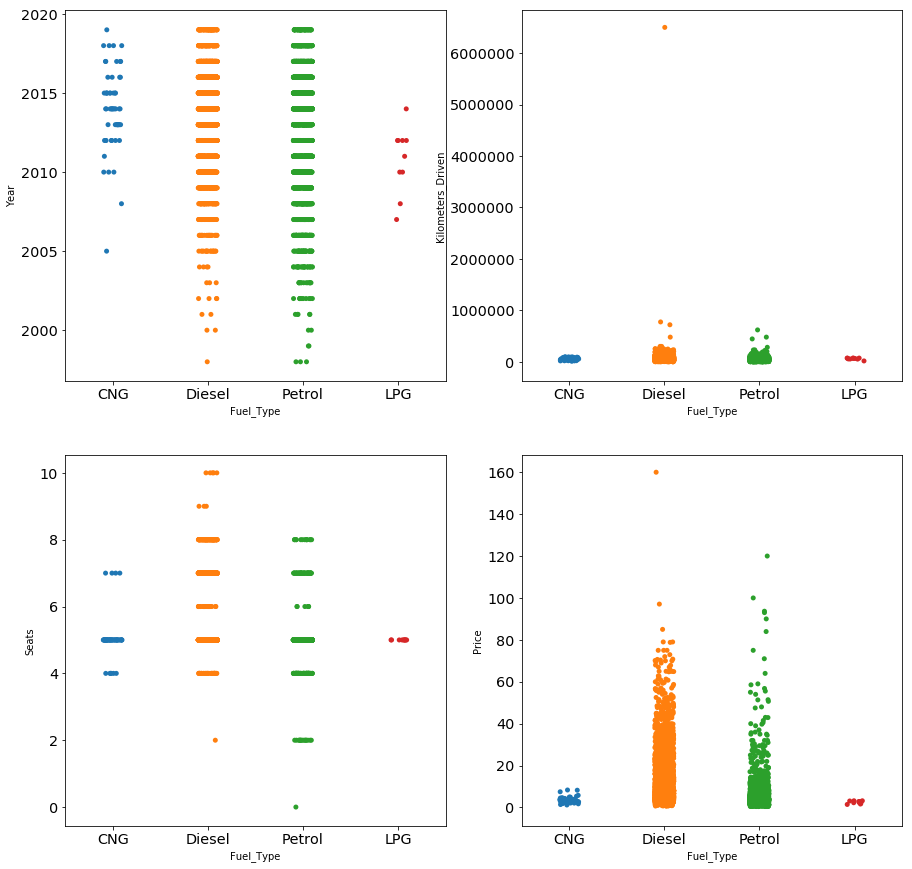

In [30]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, 4):
    ax = fig.add_subplot(2, 2, i+1)
    sns.catplot(ax=ax, data=data, x='Fuel_Type', y=num[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(num) + 1)

pada kolom fuel type yaitu diesel memiliki harga yang cenderung tinggi dari yang lainnya

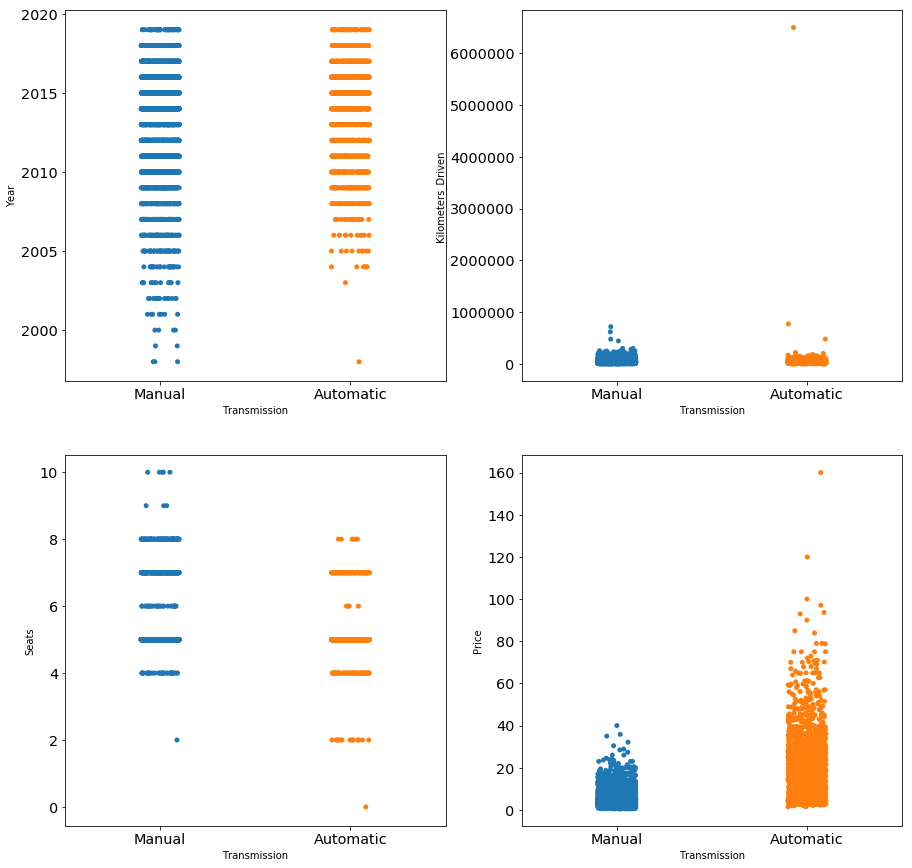

In [31]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, 4):
    ax = fig.add_subplot(2, 2, i+1)
    sns.catplot(ax=ax, data=data, x='Transmission', y=num[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(num) + 1)

- untuk transmission, automatic memiliki harga yang lebih tinggi dari manual

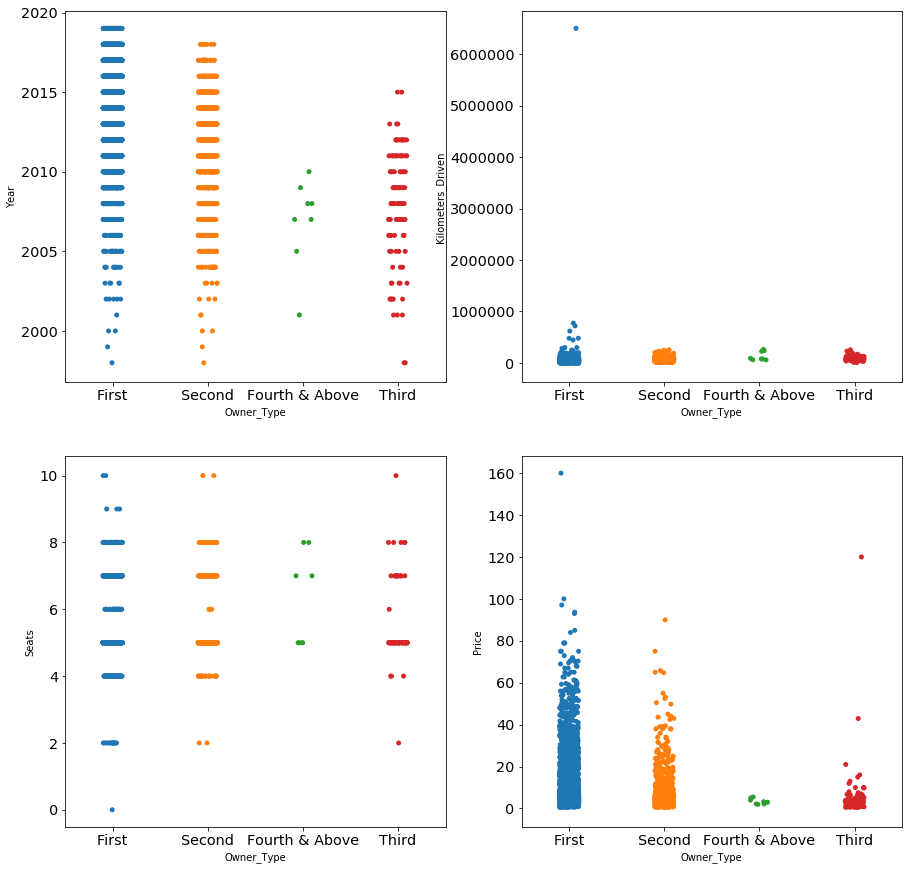

In [32]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, 4):
    ax = fig.add_subplot(2, 2, i+1)
    sns.catplot(ax=ax, data=data, x='Owner_Type', y=num[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(num) + 1)

- untuk owner type yang memiliki harga cenderung tinggi yaitu first owner


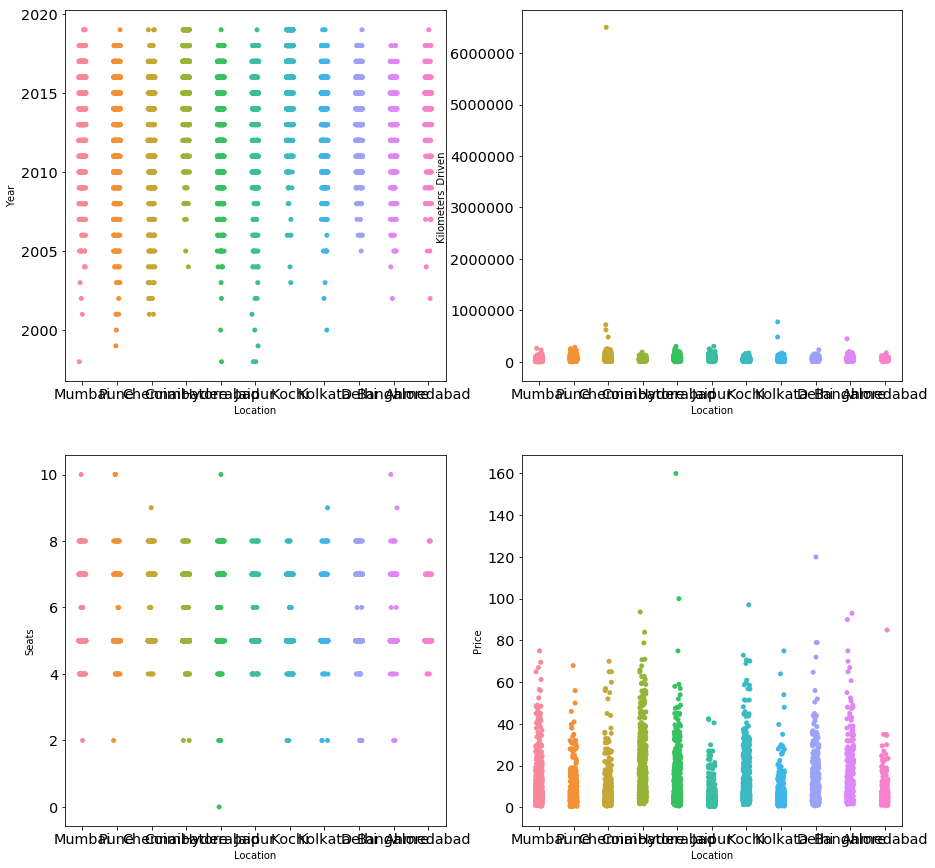

In [33]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, 4):
    ax = fig.add_subplot(2, 2, i+1)
    sns.catplot(ax=ax, data=data, x='Location', y=num[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(num) + 1)

membuktikan kolom yang memiliki unique banyak  tidak terlihat polanya, seperti location juga terlihat tidak memiliki korelasi yang berarti dengan kolom numerik apapun dan dapat kita abaikan dalam proses modeling nanti. 

## EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data tidak ada kecacatan karena data dapat diapahami strukturnya
* Namun masih ada data-data yang missing, sehingga harus dihandle baik dengan fill/ drop
* Ada beberapa distribusi yang sedikit *skewed*, hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal
* Beberapa *feature* memiliki korelasi yang jelas dengan *target*, mereka akan dipakai, seperti price dengan year, transmission dengan price, kemudian owner type dengan price.
* Beberapa *feature* terlihat sama sekali tidak berkorelasi, mereka sebaiknya diabaikan, seperti location 

In [27]:
import re #untuk melakukan ekstraksi pada jenis data string menjadi numerik

In [28]:
data['Year_norm']=data['Year_norm'].astype(float)
data['Kilometers_Driven_norm']=data['Kilometers_Driven_norm'].astype(float)
data['Mileage'] = data['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)',r'\1', str(x)))
data['Mileage']=data['Mileage'].astype(float)
data['Engine'] = data['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
data['Engine']=data['Engine'].astype(float)


In [29]:
data['Power'] = data['Power'].str.split(' ').str[0]
# including nan rows there is data in this column of 'null' value
data.Power[data.Power == 'null'] = np.NaN
data['Power'] = data['Power'].astype(float)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 18 columns):
Name                      5975 non-null object
Location                  5975 non-null object
Year                      5975 non-null int64
Kilometers_Driven         5975 non-null int64
Fuel_Type                 5975 non-null object
Transmission              5975 non-null object
Owner_Type                5975 non-null object
Mileage                   5975 non-null float64
Engine                    5975 non-null float64
Power                     5872 non-null float64
Seats                     5975 non-null float64
New_Price                 5975 non-null object
Price                     5975 non-null float64
Year_norm                 5975 non-null float64
Kilometers_Driven_norm    5975 non-null float64
Seats_norm                5975 non-null float64
Price_norm                5975 non-null float64
price_class               5975 non-null bool
dtypes: bool(1), float64(9), int64(2), obj

In [31]:
#pada power masih terdapat null
data['Power'].fillna(data['Power'].mode()[0], inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 18 columns):
Name                      5975 non-null object
Location                  5975 non-null object
Year                      5975 non-null int64
Kilometers_Driven         5975 non-null int64
Fuel_Type                 5975 non-null object
Transmission              5975 non-null object
Owner_Type                5975 non-null object
Mileage                   5975 non-null float64
Engine                    5975 non-null float64
Power                     5975 non-null float64
Seats                     5975 non-null float64
New_Price                 5975 non-null object
Price                     5975 non-null float64
Year_norm                 5975 non-null float64
Kilometers_Driven_norm    5975 non-null float64
Seats_norm                5975 non-null float64
Price_norm                5975 non-null float64
price_class               5975 non-null bool
dtypes: bool(1), float64(9), int64(2), obj

In [33]:
#melakukan encoding pada tipe data string
data1=pd.get_dummies(data[['Transmission','Fuel_Type']])
data1.head()

,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,1,1,0,0,0
1,0,1,0,1,0,0
2,0,1,0,0,0,1
3,0,1,0,1,0,0
4,1,0,0,1,0,0


In [34]:
data2 = pd.concat([data,data1], axis=1)#menggabungkan 2 dataframe
data2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Kilometers_Driven_norm,Seats_norm,Price_norm,price_class,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,...,0.011051,0.5,0.008210,True,0,1,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,0.006282,0.5,0.075583,True,0,1,0,1,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,0.007051,0.5,0.025445,True,0,1,0,0,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,0.013359,0.7,0.034846,True,0,1,0,1,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0.006231,0.5,0.108423,True,1,0,0,1,0,0


In [35]:
#bagian modeling
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("dark")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

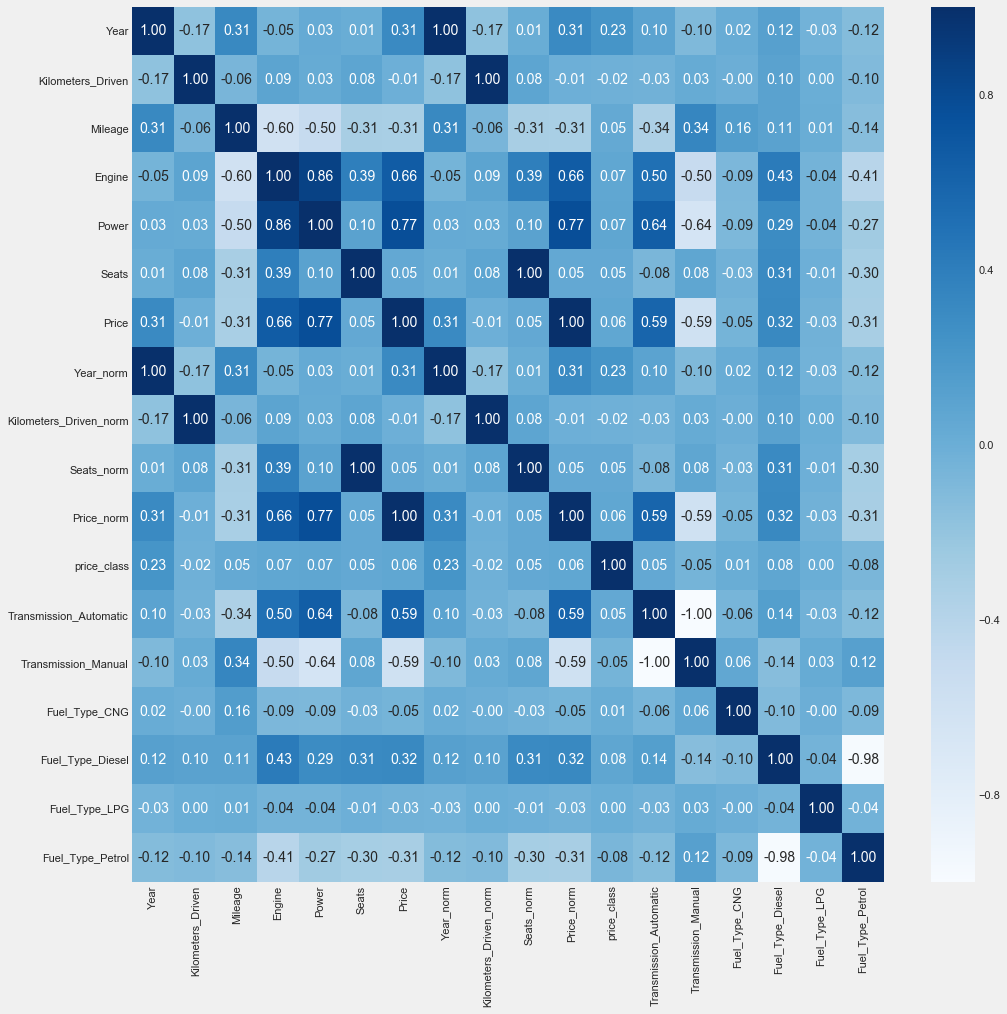

In [37]:
#cek korelasi antar feature
plt.figure(figsize=(15, 15))
sns.heatmap(data2.corr(), cmap='Blues', annot=True, fmt='.2f')

perlu modifikasi beberapa feature dengan menghapus atau melakukan log

In [36]:
data2.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Year_norm', 'Kilometers_Driven_norm',
       'Seats_norm', 'Price_norm', 'price_class', 'Transmission_Automatic',
       'Transmission_Manual', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol'],
      dtype='object')

In [37]:
data3 = data2.drop(['Year','Kilometers_Driven','Seats','Price','New_Price',
                   'Kilometers_Driven_norm','Seats_norm',], 1)

In [38]:
data3['log_Price']=np.log10(data2['Price'])

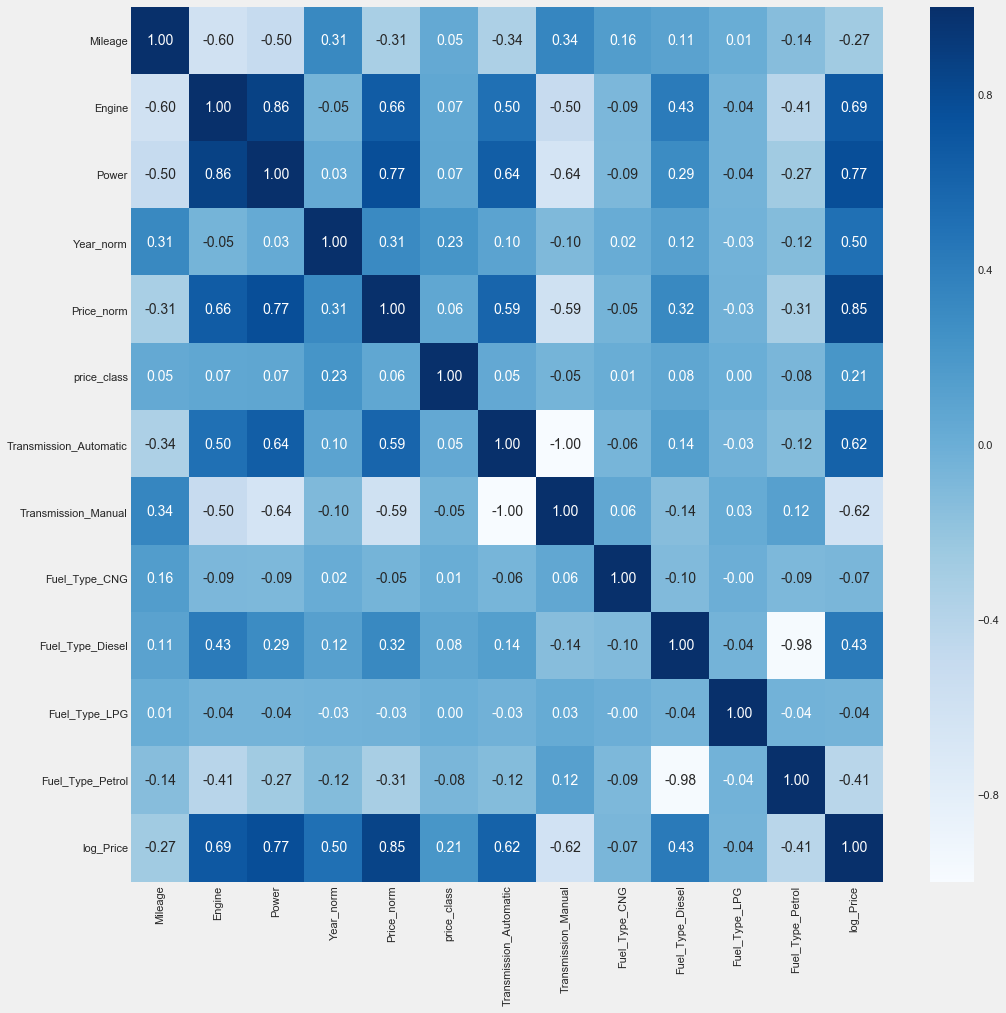

In [39]:
#cek korelasi antar feature
plt.figure(figsize=(15, 15))
sns.heatmap(data3.corr(), cmap='Blues', annot=True, fmt='.2f')

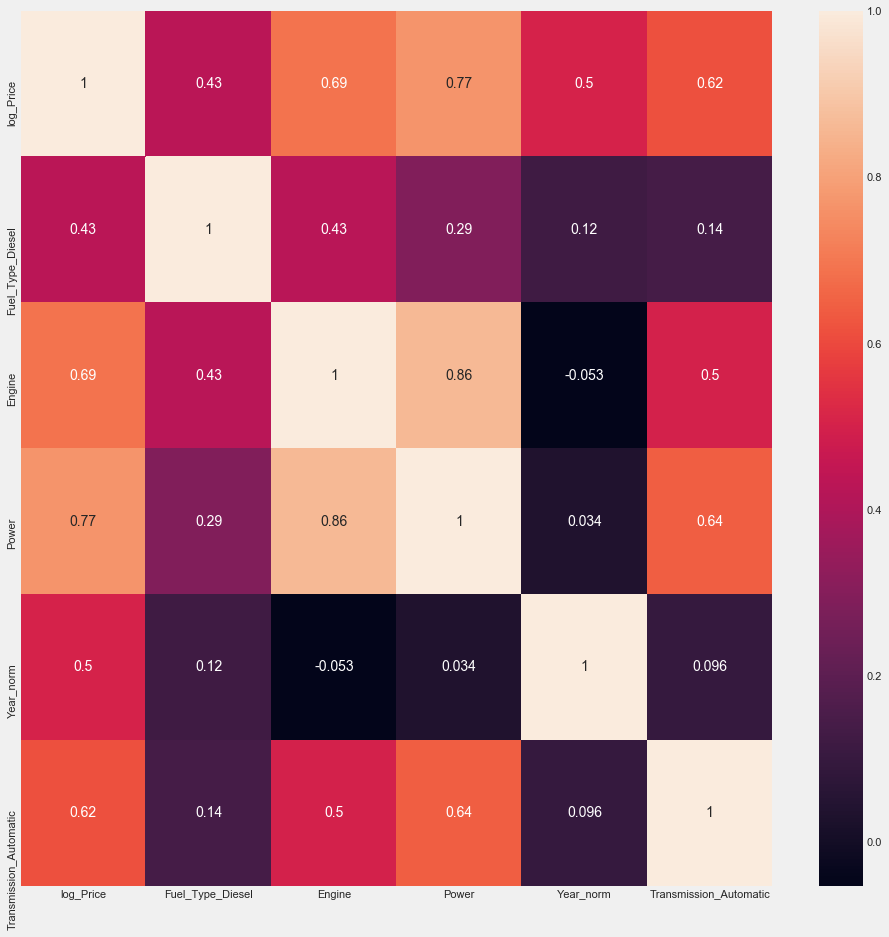

In [40]:
plt.figure(figsize=(15, 15))
sns.heatmap(data3[['log_Price','Fuel_Type_Diesel'
                  ,'Engine','Power','Year_norm','Transmission_Automatic']].corr()
           ,annot=True)#perbesar

In [41]:
spek=data3[['Power','Engine','Year_norm','Transmission_Automatic','Fuel_Type_Diesel']].values
price=data3['log_Price']
x = np.array(spek).reshape(-1, 5) #independent variable
y = np.array(price) # dependent variable


In [42]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=8)
#Fitting simple linear regression to the Training Set
from  sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(xtrain, ytrain)
#Predicting the log confirmed
pred = regressor.predict(xtest)
pred

array([0.08523032, 0.38022407, 0.76156295, ..., 1.09557995, 0.93079444,
       0.66013078])

In [43]:
regressor.score(xtest, ytest)#liat skor data test

0.9204147822034909

In [44]:
regressor.score(xtrain, ytrain)#liat skor data train

0.9674628009672451

In [45]:
harga_log=regressor.predict([[88.70,1582.0,0.62,0,0]])
harga_log #cek harga prediksi

array([0.49439701])

In [46]:

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
print('tabel error randomforest : ')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(ytest, pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(ytest, pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(ytest, pred)))
print('R Squared Error          : ', metrics.r2_score(ytest, pred))
# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score           :  %.2f' % r2_score(ytest, pred))


tabel error randomforest : 
Mean Absolute Error      :  0.07787858851519125
Mean Squared  Error      :  0.01125053042133625
Root Mean Squared  Error :  0.10606851757866823
R Squared Error          :  0.9204147822034909
Variance score           :  0.92


In [47]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
x1train, x1test, y1train, y1test = train_test_split(x,y,test_size=0.2, random_state=8)
from sklearn.linear_model import LinearRegression 
regressor1 = LinearRegression()
regressor1.fit(xtrain, ytrain)
pred1 = regressor1.predict(xtest)
pred1

array([-0.03139809,  0.3660658 ,  0.83188782, ...,  0.9588839 ,
        0.98581964,  0.72982483])

In [48]:
regressor1.score(x1test, y1test)#skor untuk linear regresi

0.8648735661380744

In [49]:
regressor1.score(x1train, y1train)

0.8668588878596134

In [50]:
harga_log=regressor1.predict([[88.70,1582.0,0.62,0,0]])
harga_log #cek harga prediksi

array([0.48803744])

In [51]:
# The coefficients
print('Coefficients: \n', regressor1.coef_)#untuk linear regresi model
# The Intercept
print('Intercept: \n', regressor1.intercept_)#untuk linear model regresi

print('tabel error linear regression : ')
print('Mean Absolute Error           : ', metrics.mean_absolute_error(ytest, pred1))
print('Mean Squared  Error           : ', metrics.mean_squared_error(ytest, pred1))
print('Root Mean Squared  Error      : ', np.sqrt(metrics.mean_squared_error(ytest, pred1)))
print('R Squared Error               : ', metrics.r2_score(ytest, pred1))
# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score                :  %.2f' % r2_score(ytest, pred1))

Coefficients: 
 [3.03863956e-03 1.21404412e-04 1.14542954e+00 1.48780847e-01
 1.06879653e-01]
Intercept: 
 -0.6837179870119403
tabel error linear regression : 
Mean Absolute Error           :  0.10293869713164204
Mean Squared  Error           :  0.01910209077742776
Root Mean Squared  Error      :  0.1382103135711216
R Squared Error               :  0.8648735661380744
Variance score                :  0.86


In [52]:

from sklearn.tree import DecisionTreeRegressor
regressor2=DecisionTreeRegressor()
regressor2.fit(xtrain, ytrain)
pred2 = regressor2.predict(xtest)
pred2

array([0.09691001, 0.42324587, 0.76285132, ..., 1.0925406 , 0.93072066,
       0.70907562])

In [53]:
regressor2.score(xtest, ytest) #skor untuk decisiontree

0.895351868669632

In [54]:
regressor2.score(xtrain, ytrain)

0.9734728117458531

In [55]:
harga_log=regressor2.predict([[88.70,1582.0,0.62,0,0]])
harga_log #cek harga prediksi

array([0.77815125])

In [56]:
print('tabel error decissiontree: ')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(ytest, pred2))
print('Mean Squared  Error      : ', metrics.mean_squared_error(ytest, pred2))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(ytest, pred2)))
print('R Squared Error          : ', metrics.r2_score(ytest, pred2))
# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score           :  %.2f' % r2_score(ytest, pred2))

tabel error decissiontree: 
Mean Absolute Error      :  0.08634013325197121
Mean Squared  Error      :  0.014793538519661375
Root Mean Squared  Error :  0.12162869118617274
R Squared Error          :  0.895351868669632
Variance score           :  0.90


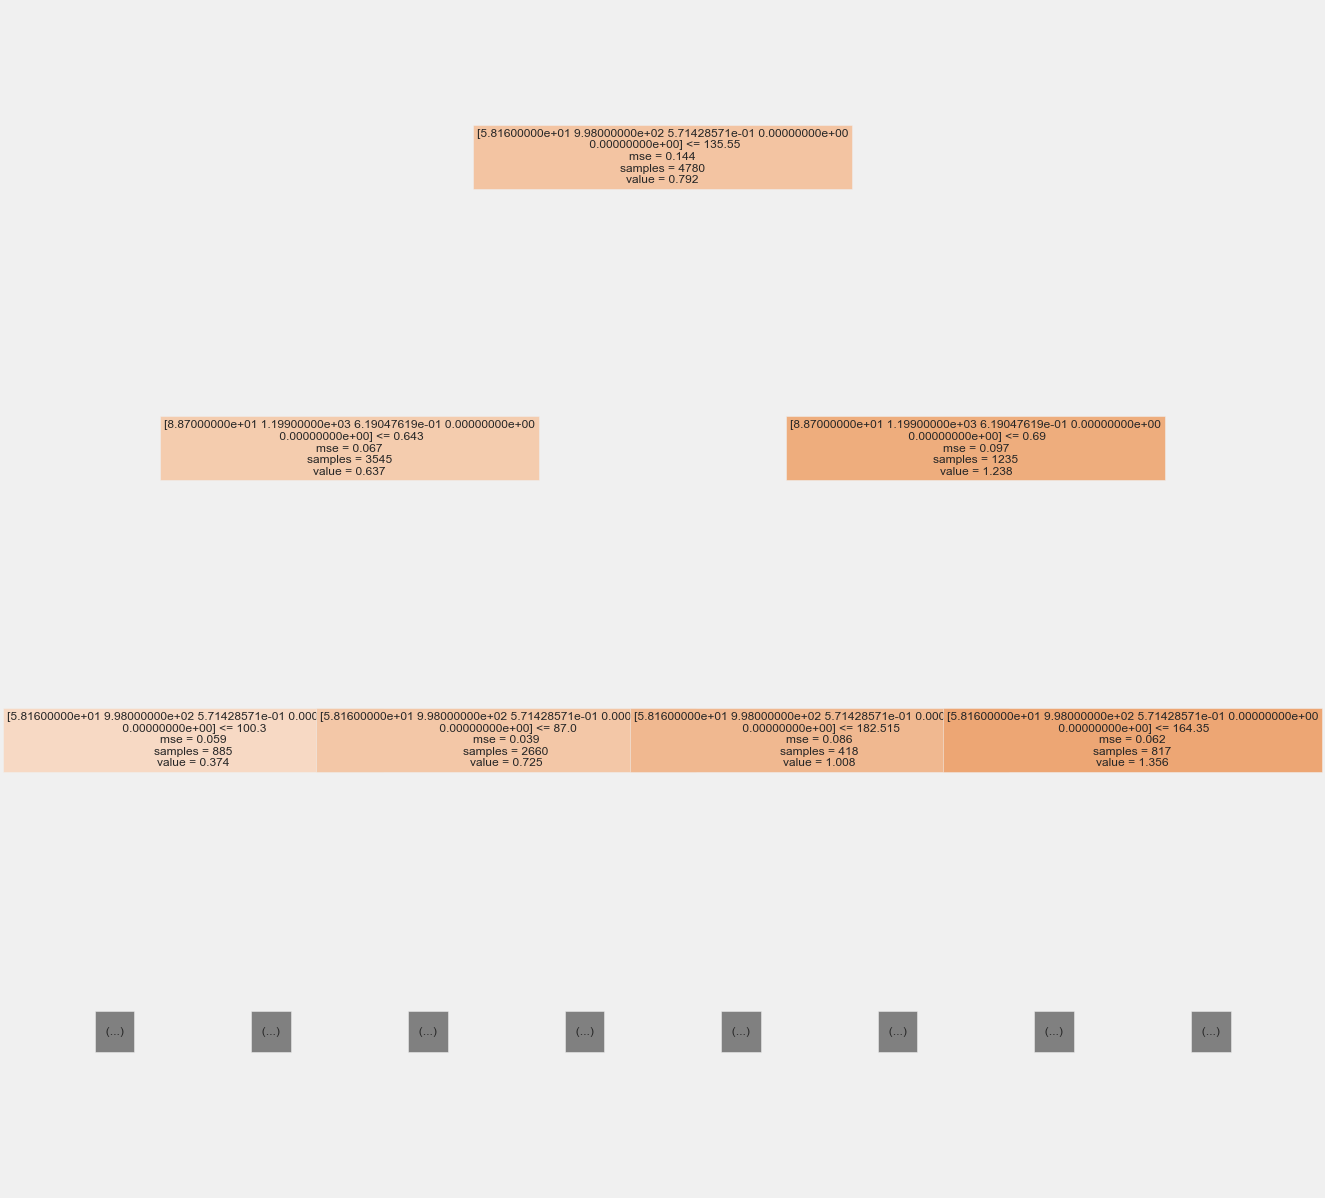

In [60]:

from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(regressor2,
               feature_names = spek,
               class_names=price,
               filled = True, max_depth=2, fontsize=12)
plt.show()

In [57]:


from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix

print('tabel error : ')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(ytest, pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(ytest, pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(ytest, pred)))
print('R Squared Error          : ', metrics.r2_score(ytest, pred))


# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(ytest, pred))


tabel error : 
Mean Absolute Error      :  0.07787858851519125
Mean Squared  Error      :  0.01125053042133625
Root Mean Squared  Error :  0.10606851757866823
R Squared Error          :  0.9204147822034909
Variance score: 0.92


kita pilih randomforest karena memiliki skor akurasi yang besar untuk data test nya.

In [58]:
data3.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Year_norm,Price_norm,price_class,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,log_Price
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.60,998.0,58.16,0.571429,0.008210,True,0,1,1,0,0,0,0.243038
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67,1582.0,126.20,0.809524,0.075583,True,0,1,0,1,0,0,1.096910
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.20,1199.0,88.70,0.619048,0.025445,True,0,1,0,0,0,1,0.653213
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77,1248.0,88.76,0.666667,0.034846,True,0,1,0,1,0,0,0.778151
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.20,1968.0,140.80,0.714286,0.108423,True,1,0,0,1,0,0,1.248954


In [59]:
data3 = data3.drop(['Fuel_Type_Petrol','Fuel_Type_LPG','Fuel_Type_CNG','Transmission_Manual','price_class'], 1)

In [60]:
data3.sample(5)

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Year_norm,Price_norm,Transmission_Automatic,Fuel_Type_Diesel,log_Price
3399,Volkswagen Polo 1.2 MPI Highline,Mumbai,Petrol,Manual,First,16.47,1198.0,74.0,0.809524,0.024505,0,0,0.638489
850,Toyota Innova Crysta 2.4 ZX MT,Pune,Diesel,Manual,First,13.68,2393.0,147.8,0.904762,0.113813,0,1,1.269513
1252,Maruti Baleno Sigma 1.2,Kochi,Petrol,Manual,First,21.40,1197.0,83.1,0.952381,0.038418,0,0,0.817565
3554,Hyundai Verna 1.4 CX VTVT,Kolkata,Petrol,Manual,First,17.43,1396.0,105.5,0.761905,0.030145,0,0,0.720159
5684,Maruti Baleno Zeta,Coimbatore,Petrol,Manual,First,21.40,1197.0,83.1,0.952381,0.043557,0,0,0.868644


In [61]:
data3 = data3.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type','Mileage',
                   'Price_norm'], 1)

In [66]:
data3.head(13)

,Engine,Power,Year_norm,Transmission_Automatic,Fuel_Type_Diesel,log_Price
0,998.0,58.16,0.571429,0,0,0.243038
1,1582.0,126.20,0.809524,0,1,1.096910
2,1199.0,88.70,0.619048,0,0,0.653213
3,1248.0,88.76,0.666667,0,1,0.778151
4,1968.0,140.80,0.714286,1,1,1.248954
5,814.0,55.20,0.666667,0,0,0.371068
6,1461.0,63.10,0.714286,0,1,0.544068
7,2755.0,171.50,0.857143,1,1,1.243038
8,1598.0,103.60,0.714286,0,1,0.716003
9,1248.0,74.00,0.666667,0,1,0.290035


In [73]:
harga_log=regressor1.predict([[74, 1248, 0.809524, 1, 1]])
#cek harga prediksi untuk random forest
print(harga_log)
print(np.exp(harga_log)) #harga asli

[0.87556725]
[2.40023645]


In [80]:
((1.391464-1.37043529)/1.391464)*100#perbedaan harga (dalam log) dengan satuan persen

1.5112651135782134

In [74]:
harga_log=regressor.predict([[74, 1248, 0.809524, 1, 1]])
#cek harga prediksi untuk randomforest
print(harga_log)
print(np.exp(harga_log)) #harga asli

[0.71606549]
[2.04636591]


In [85]:
((1.391464-1.3696374)/1.391464)*100 #perbedaan harga (dalam log) dengan satuan persen

1.5686068773608248

In [75]:
harga_log=regressor2.predict([[74, 1248, 0.809524, 1, 1]])
#cek harga prediksi untuk decission tree
print(harga_log)
print(np.exp(harga_log)) #harga asli

[0.70907562]
[2.03211195]


In [87]:
((1.391464-1.36644077)/1.391464)*100 #perbedaan harga dalam log dengan satuan persen

1.7983382969304236